<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Desribe-data" data-toc-modified-id="Desribe-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Desribe data</a></span><ul class="toc-item"><li><span><a href="#Sample-size" data-toc-modified-id="Sample-size-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sample size</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Histograms</a></span></li></ul></li><li><span><a href="#Kendall's-Tau-correlation" data-toc-modified-id="Kendall's-Tau-correlation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kendall's Tau correlation</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kendalltau
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/cleaned_data_gca.csv')

# Exploratory data analysis

## Desribe data

### Sample size

In [3]:
print('Sample size socio-demographics =', df[df.columns[0]].count())
print('Sample size psychological variables =', df[df.columns[4]].count())

Sample size socio-demographics = 35
Sample size psychological variables = 36


### Descriptive statistics

**Descriptive statistics for numeric data**

In [4]:
descriptive_stat = df.describe()
descriptive_stat = descriptive_stat.T
descriptive_stat['skew'] = df.skew()
descriptive_stat['kurtosis'] = df.kurt()
descriptive_stat.insert(loc=5, column='median', value=df.median())

descriptive_stat=descriptive_stat.apply(pd.to_numeric, errors='ignore')

In [5]:
descriptive_stat

,count,mean,std,min,25%,median,50%,75%,max,skew,kurtosis
age,35.0,26.314286,10.180060,14.0,20.000,24.00,24.00,30.000,67.0,2.062016,6.507479
income,35.0,4.028571,1.706143,1.0,3.000,5.00,5.00,5.000,7.0,-0.423868,-0.557989
reference persons,36.0,2.750000,0.996422,1.0,2.000,3.00,3.00,3.000,5.0,0.355483,0.009028
injunctive norm,36.0,4.194444,1.653040,1.0,3.000,4.00,4.00,5.000,7.0,-0.167797,-0.664556
descriptive norm,36.0,2.333333,1.069045,1.0,2.000,2.00,2.00,3.000,5.0,0.610771,-0.262968
perceived consumer effectiveness,36.0,5.305556,1.564233,2.0,4.000,5.00,5.00,7.000,7.0,-0.446812,-1.021647
social desireability,36.0,3.777778,1.587651,1.0,3.000,4.00,4.00,5.000,7.0,-0.111805,-0.634817
environmental attitudes,36.0,6.222222,0.974272,2.5,6.000,6.50,6.50,7.000,7.0,-1.996880,5.273286
technosalvation,36.0,4.833333,1.558387,1.0,4.000,5.00,5.00,6.000,7.0,-0.905914,0.636700
personal affectedness,36.0,5.138889,1.570310,2.0,4.000,5.50,5.50,6.250,7.0,-0.383267,-1.020365


**Descriptive statistics for categorical data**

In [6]:
for col in list(df[['gender','education level']]):
  print('variable:', col)
  print(df[col].value_counts(dropna=False).to_string())
  print('')

variable: gender
Männlich    20
Weiblich    14
Divers       1
NaN          1

variable: education level
Hochschulabschluss          18
Abitur                       8
derzeit noch Schüler\*in     5
derzeit noch Schüler/*in     3
Fachhochschulabschluss       1
NaN                          1



### Shapiro-Wilk Test

In [7]:
# define Shapiro Wilk Test function
def shapiro_test(data):
    '''calculate K-S Test for and out  results in table'''    
    data = data._get_numeric_data()
    data_shapiro_test = pd.DataFrame()
    
    # Iterate over columns, calculate test statistic & create table
    for column in data: 
        column_shapiro_test = shapiro(data[column])
        shapiro_pvalue_column = column_shapiro_test.pvalue
        if column_shapiro_test.pvalue < .05:
            shapiro_pvalue_column = '{:.6f}'.format(shapiro_pvalue_column) + '*'
            column_distr = 'non-normal'
        else:
            column_distr = 'normal'
        new_row = {'variable': column, 
                   'Shapiro Wilk p-value': shapiro_pvalue_column, 
                   'Shapiro Wilk statistic': column_shapiro_test.statistic,
                   'distribution': column_distr
                  }
        data_shapiro_test = data_shapiro_test.append(new_row, ignore_index=True)
        data_shapiro_test = data_shapiro_test[['variable', 'Shapiro Wilk statistic', 'Shapiro Wilk p-value', 'distribution']]
    return data_shapiro_test

In [8]:
shapiro_test(df.dropna())

,variable,Shapiro Wilk statistic,Shapiro Wilk p-value,distribution
0,age,0.831301,0.000089*,non-normal
1,income,0.906274,0.005856*,non-normal
2,reference persons,0.901459,0.004329*,non-normal
3,injunctive norm,0.949805,0.111766,normal
4,descriptive norm,0.872347,0.000774*,non-normal
5,perceived consumer effectiveness,0.877474,0.001035*,non-normal
6,social desireability,0.947439,0.0945389,normal
7,environmental attitudes,0.756152,0.000003*,non-normal
8,technosalvation,0.889895,0.002139*,non-normal
9,personal affectedness,0.895628,0.003023*,non-normal


### Histograms

**Histograms: Likert-scale variables**

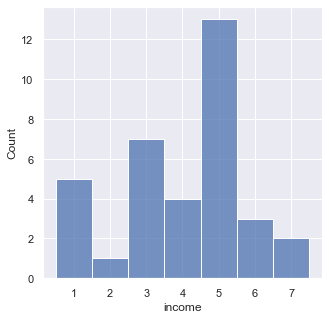

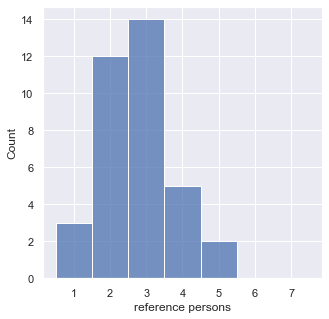

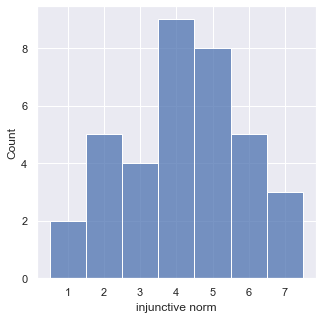

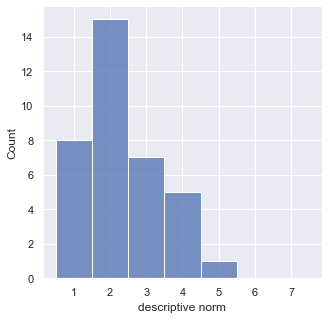

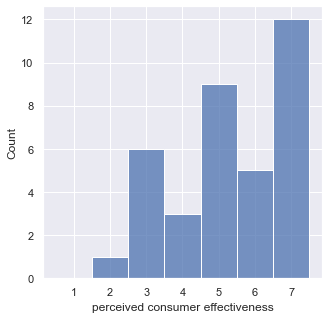

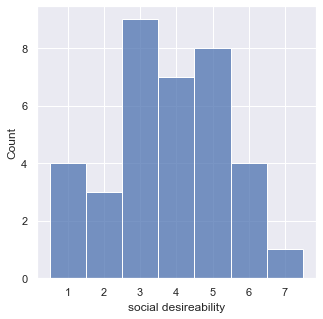

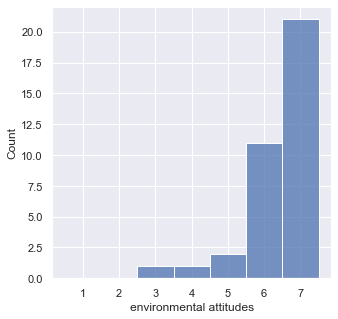

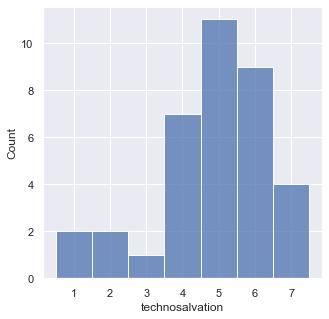

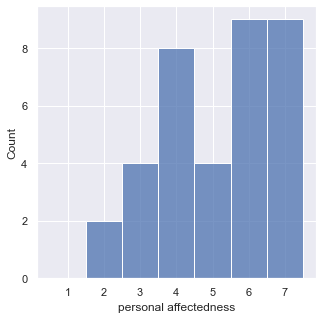

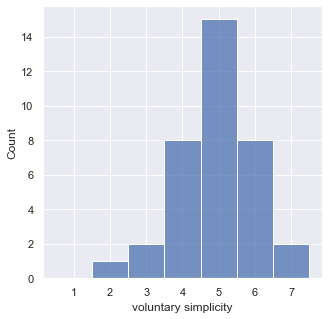

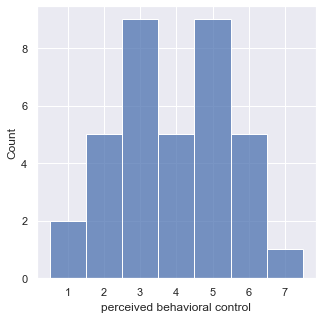

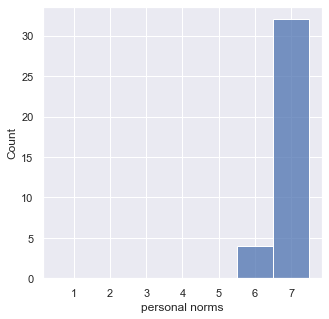

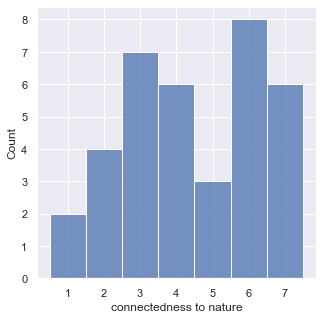

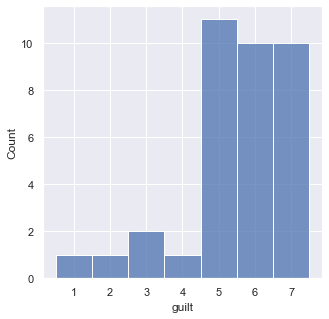

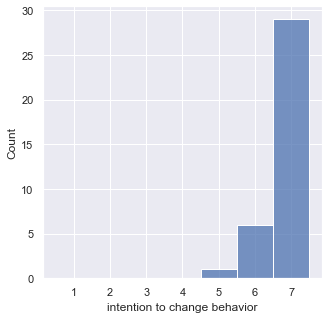

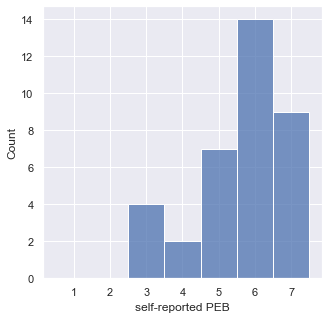

In [9]:
for column in df._get_numeric_data().drop(columns=['assessed PEB','age']):
    sns.set(rc={'figure.figsize':(5,5)})
    data = df[column]
    sns.histplot(data, bins=np.arange(1,9)-.5) 
    plt.xlabel(column)
    plt.show()

**Histogramm: age**

<AxesSubplot:xlabel='age', ylabel='Count'>

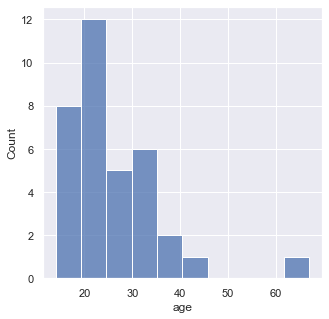

In [10]:
sns.histplot(df['age'], bins=10)

**Histogramm: assessed PEB**

<AxesSubplot:xlabel='assessed PEB', ylabel='Count'>

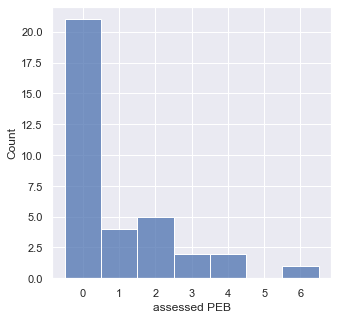

In [11]:
sns.histplot(df['assessed PEB'], bins=np.arange(0,8)-.5)

## Kendall's Tau correlation

In [12]:
# create df with correlation coefficient and p-value indication
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

# calculate kendall's tau correlation with p values ( < .01 = ***, < .05 = **, < .1 = *)
tau = df.corr(method = 'kendall').round(decimals=2)

pval = df.corr(method=kendall_pval) - np.eye(*tau.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.1,0.05] if x<=t]))
tau_corr_with_p_values = tau.round(4).astype(str) + p

In [13]:
# set colored highlights for correlation matri
def color_sig_blue(val):
    """
    color all significant values in blue
    """
    color = 'blue' if val.endswith('*') else 'black'
    return 'color: %s' % color

In [14]:
tau_corr_with_p_values.style.applymap(color_sig_blue)

,age,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
age,1.0**,0.16,-0.16,0.03,0.18,-0.25*,-0.23*,-0.09,0.17,-0.16,0.1,0.05,-0.11,-0.06,-0.19,0.01,0.16,-0.27**
income,0.16,1.0**,0.01,0.1,0.01,-0.33**,-0.16,0.06,0.27**,-0.02,-0.12,0.01,-0.24,-0.22*,-0.06,-0.15,-0.13,-0.28**
reference persons,-0.16,0.01,1.0**,-0.02,-0.11,0.18,0.28**,-0.25*,0.19,-0.06,-0.15,-0.19,-0.13,-0.14,-0.16,-0.18,0.03,0.13
injunctive norm,0.03,0.1,-0.02,1.0**,0.23*,-0.31**,-0.09,-0.15,0.13,0.03,-0.03,-0.15,-0.22,-0.18,-0.28**,-0.2,-0.09,-0.16
descriptive norm,0.18,0.01,-0.11,0.23*,1.0**,-0.03,-0.26*,-0.13,0.21,0.09,0.17,0.34**,-0.24,0.24*,-0.03,-0.04,0.18,-0.12
perceived consumer effectiveness,-0.25*,-0.33**,0.18,-0.31**,-0.03,1.0**,-0.06,-0.04,-0.14,0.26*,0.1,0.18,0.23,0.11,0.24*,0.29**,0.17,0.23
social desireability,-0.23*,-0.16,0.28**,-0.09,-0.26*,-0.06,1.0**,0.03,-0.17,-0.15,-0.16,-0.18,-0.04,-0.1,-0.13,-0.03,-0.27**,0.17
environmental attitudes,-0.09,0.06,-0.25*,-0.15,-0.13,-0.04,0.03,1.0**,0.02,0.05,-0.14,0.06,0.24,0.04,0.12,0.29**,0.13,0.2
technosalvation,0.17,0.27**,0.19,0.13,0.21,-0.14,-0.17,0.02,1.0**,0.06,-0.12,0.12,-0.04,0.06,-0.24*,-0.16,0.08,0.03
personal affectedness,-0.16,-0.02,-0.06,0.03,0.09,0.26*,-0.15,0.05,0.06,1.0**,-0.05,0.07,0.1,0.06,0.24*,0.07,0.16,0.05


## Correlation Heatmap

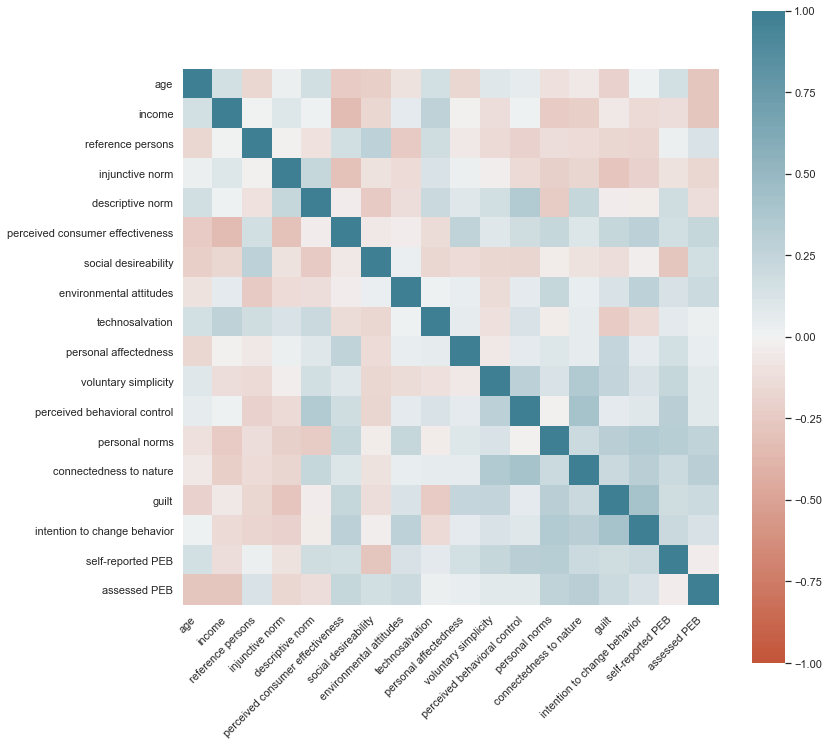

In [15]:
# calculate correlation coefficient
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

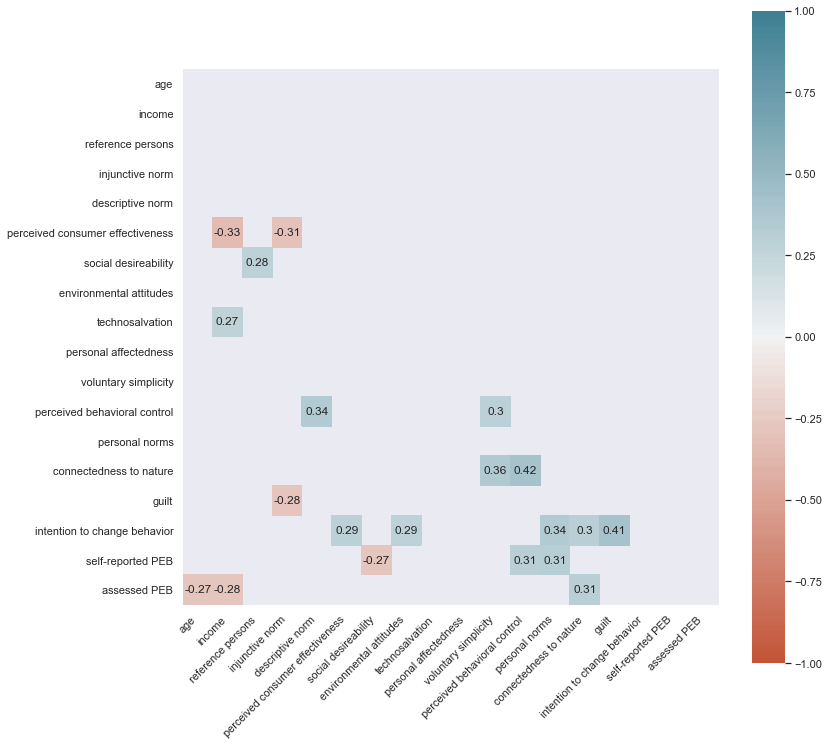

In [16]:
# calculate correlation coefficient and p-values
corr_p_values = df.corr(method = kendall_pval)
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

#set mask for only significant values (p <= .05)
mask = np.invert(np.tril(corr_p_values<.05))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

Only significant correlations (p < .05) are shown.